In [1]:
import rospkg

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [13]:
rospack = rospkg.RosPack()
raw_data = np.loadtxt(rospack.get_path('generic_gnc') + "/log/monte_carlo_results.txt", skiprows = 1)
raw_data = np.transpose(raw_data)

data_label = ["rail_zenith[°]", " wind_angle[°]",  "wind_speed[m/s]", "acc_noise[m/s²]", "gyro_noise[m/s²]", "baro_noise[m/s²]", "wind_gust_x[m/s]", "wind_gust_y[m/s]", "end_burn[s]", "used_propellant[kg]"," apogee_error[m]", "Position error_x[m]", "Position error_y[m]", "Position error_z[m]", "Speed error_x [m/s]", "Speed error_y [m/s]", "Speed error_z [m/s]", "Sensor delay [s]"]

rail_zenith = raw_data[0]
wind_angle_error = 180-raw_data[1]
wind_speed = raw_data[2]

acc_noise = raw_data[3]
gyro_noise = raw_data[4]
baro_noise = raw_data[5]

wind_gust = np.row_stack((raw_data[6], raw_data[7]))

end_burn = raw_data[8]
used_propellant = raw_data[9]

apogee_error = raw_data[10]
kalman_error = np.row_stack((raw_data[11], raw_data[12], raw_data[13]))
speed_error = np.row_stack((raw_data[14], raw_data[15], raw_data[16]))

sensor_delay = raw_data[17]

Mean apogee error: -1.5e+01[m] | 95% interval: [-89.9, 59.0]: [m]


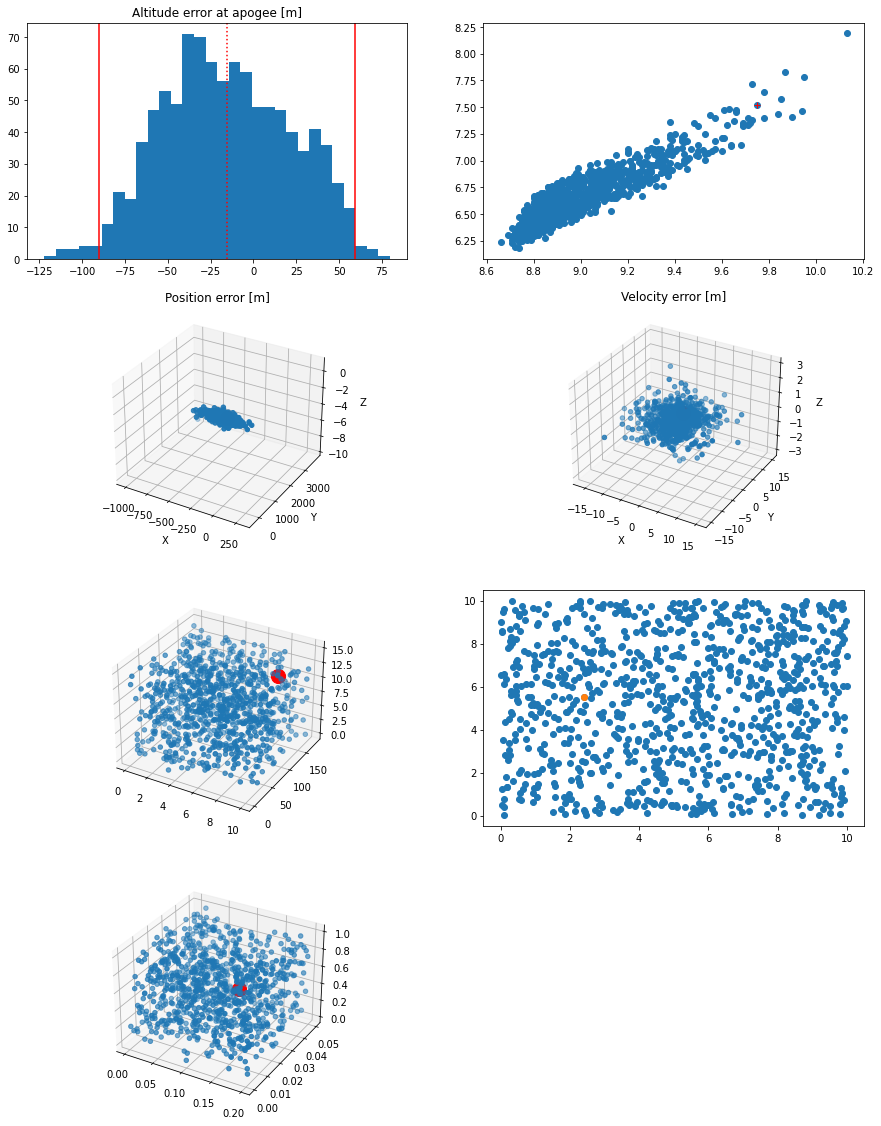

In [20]:
worst_case = np.argmax(np.abs(apogee_error))
apogee_error_filt = apogee_error[np.arange(len(apogee_error))!=worst_case]

#fig, axe = plt.subplots(2,2, figsize=(15,10))

#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize=(15,20))

axe = fig.add_subplot(421)
axe.hist(apogee_error, bins = 30)
axe.set_title("Altitude error at apogee [m]")
axe.axvline(np.mean(apogee_error) + 2*np.std(apogee_error), color="r")
axe.axvline(np.mean(apogee_error) -2*np.std(apogee_error), color="r")
axe.axvline(np.mean(apogee_error), color="r", linestyle = ":")

axe = fig.add_subplot(422)
axe.scatter(used_propellant, end_burn)
axe.plot(used_propellant[worst_case], end_burn[worst_case], "r+")

axe = fig.add_subplot(423, projection='3d')
axe.scatter3D(kalman_error[0], kalman_error[1], kalman_error[2])
axe.scatter3D(kalman_error[0][worst_case], kalman_error[1][worst_case], kalman_error[2][worst_case], color = "red", s = 200)
axe.set_xlabel('X')
axe.set_ylabel('Y')
axe.set_zlabel('Z')
axe.set_title("Position error [m]")

axe = fig.add_subplot(424, projection='3d')
axe.scatter3D(speed_error[0], speed_error[1], speed_error[2])
axe.scatter3D(speed_error[0][worst_case], speed_error[1][worst_case], speed_error[2][worst_case], color = "red", s = 200)
axe.set_xlabel('X')
axe.set_ylabel('Y')
axe.set_zlabel('Z')
axe.set_title("Velocity error [m]")

axe = fig.add_subplot(425, projection='3d')
axe.scatter(rail_zenith, wind_angle_error, wind_speed)
axe.scatter(rail_zenith[worst_case], wind_angle_error[worst_case], wind_speed[worst_case], color = "red", s = 200)

axe = fig.add_subplot(426)
axe.scatter(wind_gust[0], wind_gust[1])
axe.scatter(wind_gust[0][worst_case], wind_gust[1][worst_case])

axe = fig.add_subplot(427, projection='3d')
axe.scatter(acc_noise, gyro_noise, baro_noise)
axe.scatter(acc_noise[worst_case], gyro_noise[worst_case], baro_noise[worst_case], color = "red", s = 200)


print("Mean apogee error: {:.2}[m] | 95% interval: [{:.1f}, {:.1f}]: [m]".format(np.mean(apogee_error),np.mean(apogee_error) - 2*np.std(apogee_error), np.mean(apogee_error) + 2*np.std(apogee_error)))

array([-0.15401002,  0.25090721, -0.3000964 , -0.0135403 ,  0.00308077,
        0.02393618,  0.07618484, -0.0531017 , -0.41519172, -0.4755087 ,
        1.        ,  0.028986  ,  0.03329663,  0.00714007,  0.02235351,
        0.05002346, -0.33805817,  0.01409126])

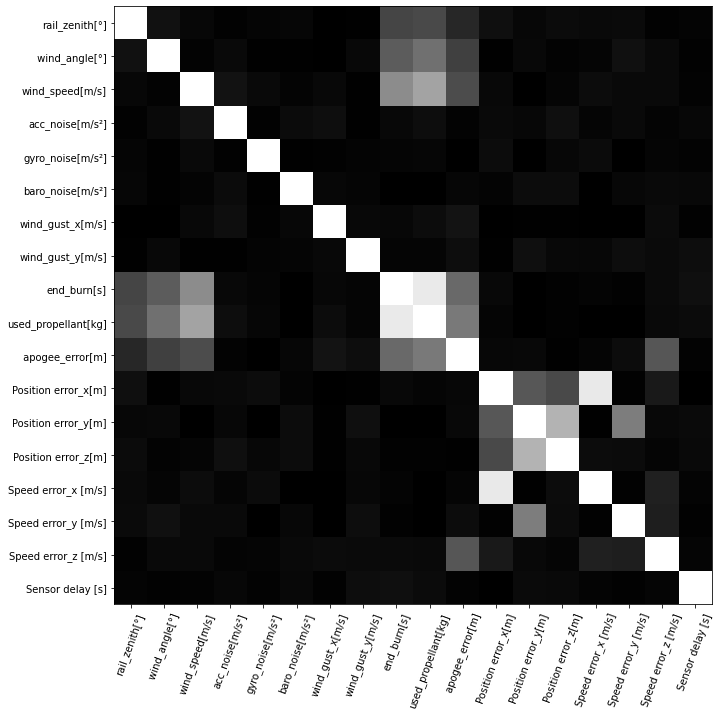

In [27]:
pearson = np.corrcoef(raw_data)
plt.figure(figsize=(11,11))
plt.imshow(np.abs(pearson), cmap='gray')

ax = plt.gca()
ax.set_yticks(np.arange(len(data_label)))
ax.set_yticklabels(data_label)

ax.set_xticks(np.arange(len(data_label)))
ax.set_xticklabels(data_label, rotation=70)

pearson[10]

array([[ 3.71707731e-01, -7.67863563e+00],
       [-7.67863563e+00,  1.38798144e+03]])

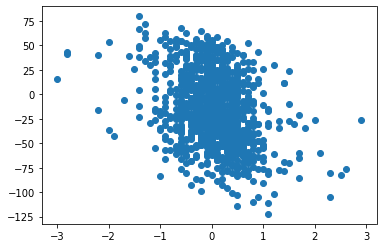

In [26]:
plt.scatter(speed_error[2], apogee_error)
np.cov([speed_error[2], apogee_error])

array([[0.00055523, 0.01199759],
       [0.01199759, 0.26452636]])

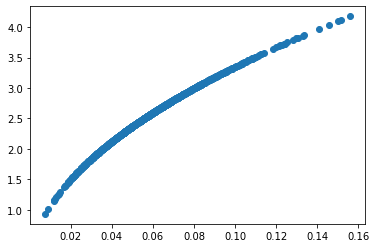

In [19]:
tau = (np.random.randn(1000)*9.67 + 46.1)/1000
a0 = 56
v0 = a0*tau
x0 = 0.5*a0*tau**2
plt.scatter(x0, v0)
np.cov([x0, v0])

In [23]:
apogee_error[worst_case]

-122.2

In [21]:
worst_case

170